In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_partidos = pd.read_csv('partidos_cebollitas.csv')
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

ypred = modelo_rl.predict(X_test)

In [2]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

#Calcular métricas de evaluación
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print(f"MSE (Error Cuadratico Medio): {mse:.2f}")
print(f"RMSE (Raiz del Error Cuadratico Medio): {rmse:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"R^2 (Coeficiente de Determinacion): {r2:.2f}")



MSE (Error Cuadratico Medio): 4.96
RMSE (Raiz del Error Cuadratico Medio): 2.23
MAE (Error Absoluto Medio): 1.89
R^2 (Coeficiente de Determinacion): -0.03


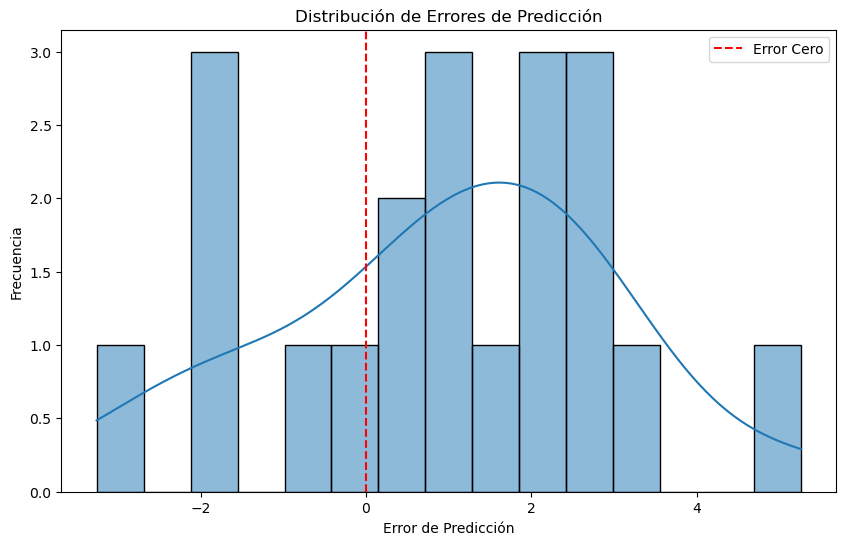

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test - ypred, bins=15, kde=True)
plt.title('Distribución de Errores de Predicción')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--', label='Error Cero')
plt.legend()
plt.show()

# Interpretacion rápida
### => MSE/RMSE: Cuanto mas cerca de 0, mejor. Indican cuanto se alejan las predicciones.
### => MAE: Error promedio en goles. Facil de entender. Un MAE de 0.8 => error promedio de 0.8 goles
### => R2: Cuanto explica el modelo del comportamiento real. 1 es perfecto, 0 es como adivinar

In [4]:
import ipywidgets as widgets

def evaluar_predicciones(threshold_mae):
    calidad = "Buena" if mae < threshold_mae else "Mala"
    print(f"Tu modelo tiene una MAE de {mae:.2f}, considerada {calidad} (umbral definido: {threshold_mae})")

unbral_widget = widgets.FloatSlider(min=0.1, value=1, Description='Umbral MAE:')
widgets.interactive(evaluar_predicciones, threshold_mae=unbral_widget)

interactive(children=(FloatSlider(value=1.0, description='threshold_mae', min=0.1), Output()), _dom_classes=('…